# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
import pickle
seaborn.set(style='ticks')

In [2]:
cab_data = pd.read_excel('../Cab_Data.xlsx',engine='openpyxl')
#print(cab_data.isnull().values.any())
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [3]:
city = pd.read_csv('../City.csv')
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [4]:
customer_id = pd.read_csv('../Customer_ID.csv')
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [5]:
transaction_ID = pd.read_csv('../Transaction_ID.csv')
transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [6]:
maindata = pd.merge(left=cab_data,right=transaction_ID,how='inner',left_on='Transaction ID',right_on='Transaction ID')

In [7]:
maindata = pd.merge(left=maindata,right=customer_id,how='inner',left_on='Customer ID',right_on='Customer ID')

In [8]:
maindata = pd.merge(left=maindata,right=city,how='inner',left_on='City',right_on='City')

In [9]:
maindata['Profit'] = maindata['Price Charged'] - maindata['Cost of Trip']

In [10]:
maindata.shape

(359392, 15)

## MODEL

In [11]:
maindata.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000


In [12]:
maindata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",143.6180
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",23.0464
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",-5.8540
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001",-6.0900


In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
data_model = maindata
data_model['year'] = pd.DatetimeIndex(data_model['Date of Travel']).year
data_model['month'] = pd.DatetimeIndex(data_model['Date of Travel']).month
data_model['day'] = pd.DatetimeIndex(data_model['Date of Travel']).day

<AxesSubplot:>

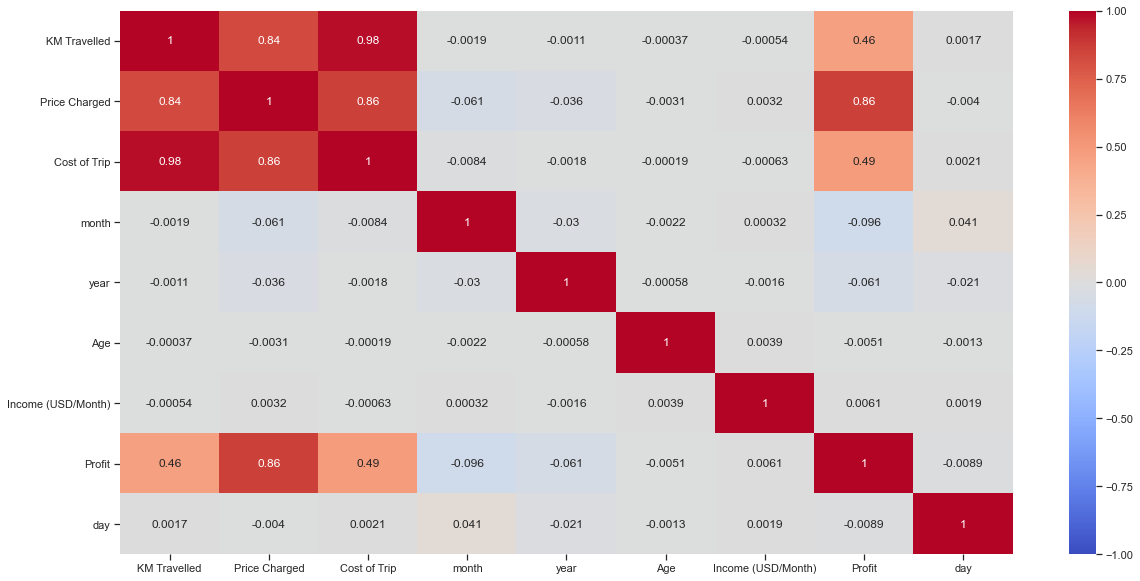

In [14]:
df = data_model[['KM Travelled','Price Charged','Cost of Trip','month','year','Age','Income (USD/Month)','Profit','day']]
df.corr()
plt.figure(figsize=(20,10))
seaborn.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

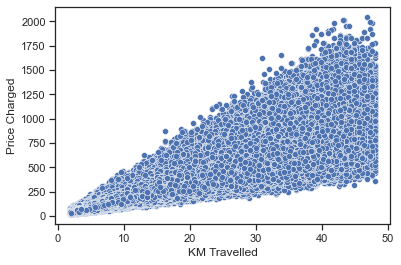

In [15]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Price Charged")

<AxesSubplot:xlabel='KM Travelled', ylabel='Cost of Trip'>

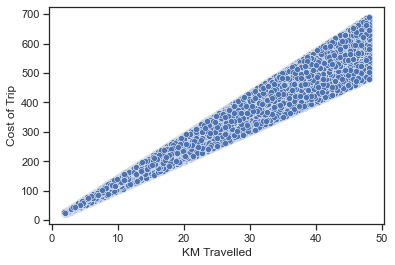

In [16]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Cost of Trip")

<AxesSubplot:xlabel='KM Travelled', ylabel='Profit'>

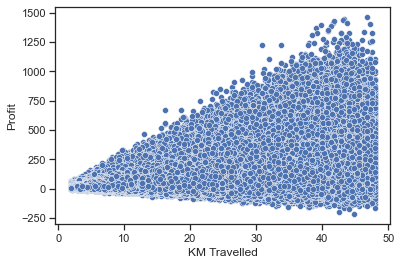

In [17]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Profit")

In [18]:
data_model.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,2018,4,21


In [19]:
dummy_company=pd.get_dummies(data_model['Company'],prefix='Company')
#dummy_city=pd.get_dummies(data_model['City'],prefix='City')
dummy_payment=pd.get_dummies(data_model['Payment_Mode'],prefix='Payment')
dummy_gender=pd.get_dummies(data_model['Gender'],prefix='Gender')

In [20]:
data_model_f=data_model.join(dummy_company)
#data_model_f = data_model_f.join(dummy_city)
data_model_f = data_model_f.join(dummy_payment)
data_model_f = data_model_f.join(dummy_gender)
data_model_f.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Profit,year,month,day,Company_Pink Cab,Company_Yellow Cab,Payment_Card,Payment_Cash,Gender_Female,Gender_Male
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,57.3150,2016,1,8,1,0,1,0,0,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,281.2772,2018,7,21,0,1,0,1,0,1
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,194.6480,2018,11,23,0,1,1,0,0,1
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,23.6660,2016,1,6,1,0,1,0,0,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,253.9808,2018,4,21,0,1,1,0,0,1


In [25]:
data_model_f['City'] = data_model_f['City'].astype("category")
data_model_f['City'] = data_model_f['City'].cat.codes

In [33]:
data_model_f.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                            int8
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Profit                       float64
year                           int64
month                          int64
day                            int64
Company_Pink Cab               uint8
Company_Yellow Cab             uint8
Payment_Card                   uint8
Payment_Cash                   uint8
Gender_Female                  uint8
Gender_Male                    uint8
dtype: object

In [24]:
#dict(enumerate(data_model_f['City'].cat.categories ))

{0: 'ATLANTA GA',
 1: 'AUSTIN TX',
 2: 'BOSTON MA',
 3: 'CHICAGO IL',
 4: 'DALLAS TX',
 5: 'DENVER CO',
 6: 'LOS ANGELES CA',
 7: 'MIAMI FL',
 8: 'NASHVILLE TN',
 9: 'NEW YORK NY',
 10: 'ORANGE COUNTY',
 11: 'PHOENIX AZ',
 12: 'PITTSBURGH PA',
 13: 'SACRAMENTO CA',
 14: 'SAN DIEGO CA',
 15: 'SEATTLE WA',
 16: 'SILICON VALLEY',
 17: 'TUCSON AZ',
 18: 'WASHINGTON DC'}

In [20]:
data_model_sk = data_model_f[[
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users',
 'Profit',
 'year',
 'month',
 'day',
 'Company_Pink Cab',
 'City',
 'Payment_Card',
 'Gender_Female']]

<AxesSubplot:>

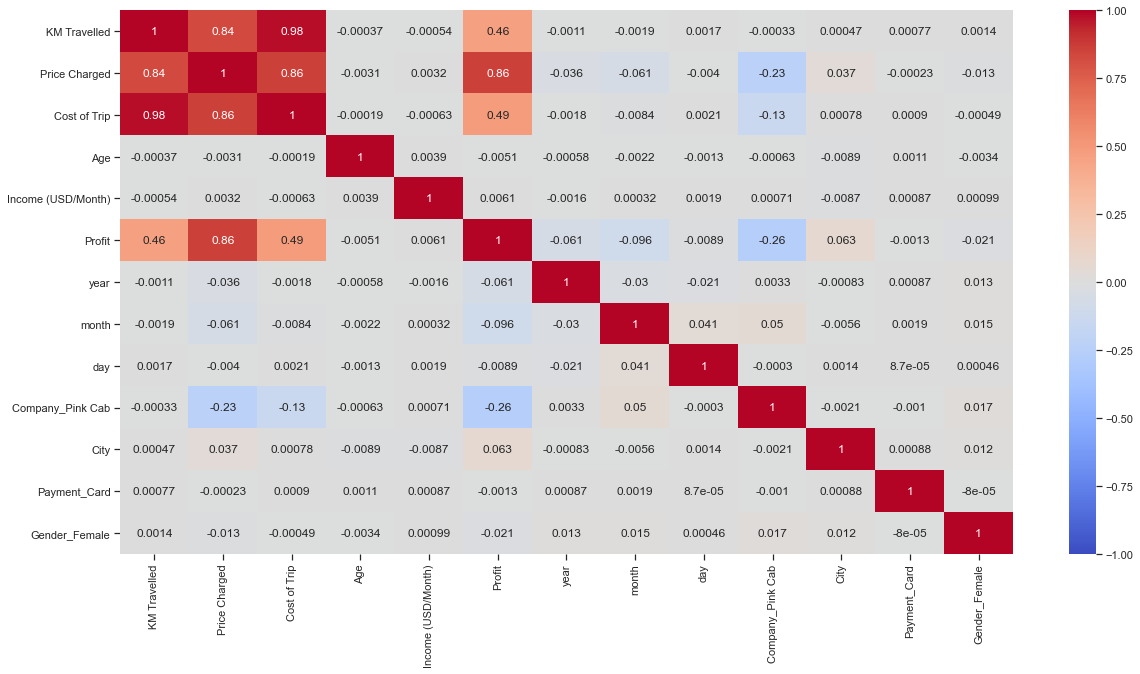

In [21]:
plt.figure(figsize=(20,10))
seaborn.heatmap(data_model_sk.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [22]:
from sklearn.model_selection import train_test_split as TTS
train,test=TTS(data_model_sk,test_size=0.20,random_state=0)
train.columns.values.tolist()

['KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users',
 'Profit',
 'year',
 'month',
 'day',
 'Company_Pink Cab',
 'City',
 'Payment_Card',
 'Gender_Female']

In [23]:
train_x = train[['KM Travelled',  'Age', 'Income (USD/Month)', 'year', 'month', 'day', 'Company_Pink Cab',
                 'City', 'Payment_Card', 'Gender_Female']]
train_y = train['Profit']
test_x = test[['KM Travelled',  'Age', 'Income (USD/Month)', 'year', 'month', 'day', 'Company_Pink Cab',
                 'City', 'Payment_Card', 'Gender_Female']]
test_y = test['Profit']

In [24]:
from sklearn.ensemble import RandomForestRegressor as RF
logit=RF(n_jobs=2,n_estimators=50, max_depth=15, min_samples_split=12)
logit.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_split=12, n_estimators=50,
                      n_jobs=2)

In [25]:
logit.score(train_x,train_y)

0.8769548014840179

In [26]:
logit.score(test_x,test_y)

0.8288408376979665

In [27]:
columna_prueba = train_x.columns.values.tolist()

In [28]:
logit.feature_importances_

array([0.28198755, 0.00912524, 0.01274333, 0.0166802 , 0.07771042,
       0.03020698, 0.09129551, 0.47831499, 0.0009236 , 0.00101217])

In [29]:
import matplotlib.pyplot as plt
import numpy

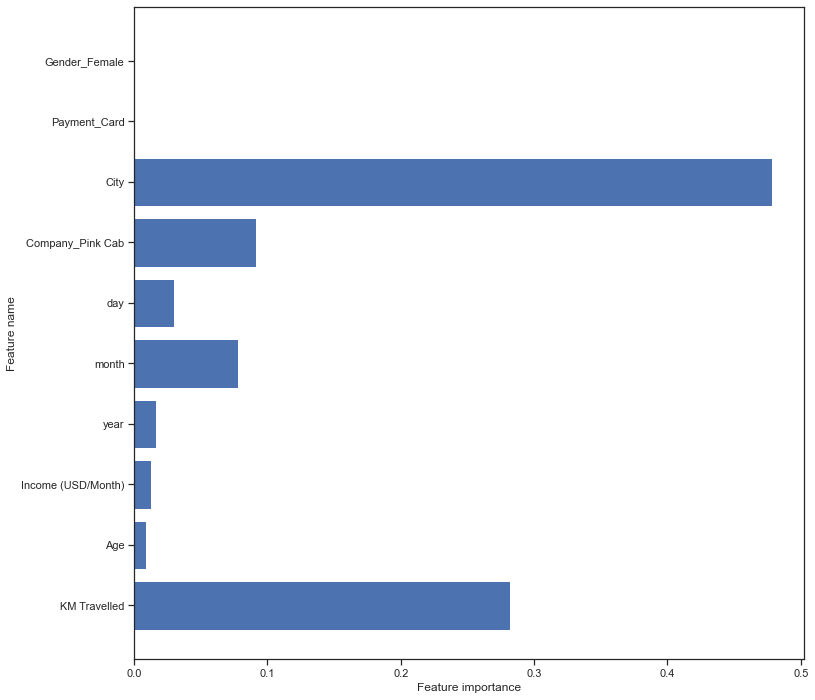

In [30]:
c_features = len(columna_prueba)
fig, ax = plt.subplots(figsize=(12, 12))
plt.barh(range(c_features), logit.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(numpy.arange(c_features), columna_prueba)
plt.show()

In [31]:
train_x = train[['KM Travelled',  'month', 'day', 'Company_Pink Cab','City']]
train_y = train['Profit']
test_x = test[['KM Travelled',  'month', 'day', 'Company_Pink Cab','City']]
test_y = test['Profit']

In [32]:
from sklearn.ensemble import RandomForestRegressor as RF
logit=RF(n_jobs=2,n_estimators=50, max_depth=15, min_samples_split=12)
logit.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_split=12, n_estimators=50,
                      n_jobs=2)

In [33]:
logit.score(train_x,train_y)

0.8491818608083906

In [34]:
logit.score(test_x,test_y)

0.8066990043933405

In [35]:
columna_prueba = train_x.columns.values.tolist()

In [36]:
logit.feature_importances_

array([0.30199547, 0.07828239, 0.03456367, 0.09344554, 0.49171292])

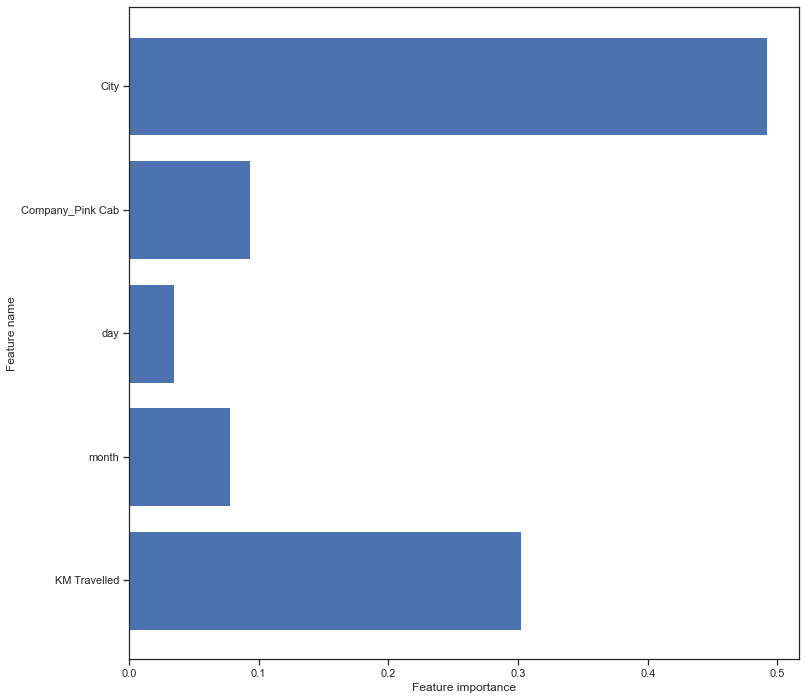

In [37]:
c_features = len(columna_prueba)
fig, ax = plt.subplots(figsize=(12, 12))
plt.barh(range(c_features), logit.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(numpy.arange(c_features), columna_prueba)
plt.show()

In [39]:
filename = 'finalized_model.sav'
pickle.dump(logit, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(train_x, train_y)
print(result)

0.8491818608083906


In [40]:
train_x.head()

,KM Travelled,month,day,Company_Pink Cab,City
150650,16.49,12,21,0,6
198737,16.65,12,13,0,9
87800,11.90,11,5,0,3
89263,2.00,8,20,0,3
307631,14.56,8,24,0,16
